<a href="https://colab.research.google.com/github/rangelokk/Diplom/blob/main/Version_archive/VN/%D0%9F%D0%BE%D0%BA%D0%B5%D0%BC%D0%BE%D0%BD_VggNet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Подключаем библиотеки

In [1]:
import kagglehub
import cv2
import tensorflow as tf
import kagglehub
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
#import imgaug.augmenters as iaa
import imageio
from PIL import Image
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
height = 64
width = 64
chanels = 3
input_shape = (height, width, chanels)  # Замените height и width на ваши размеры изображений
num_classes = 7  # Замените на количество классов вашей задачи
num_additional_features = 1  # Например, возраст и пол

### Загрузка данных

In [3]:
# Download latest version
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

print("Path to dataset files:", path)

100%|██████████| 5.20G/5.20G [00:46<00:00, 120MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2


In [4]:
data = pd.read_csv(path + "/HAM10000_metadata.csv")
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
def read_image(file_path):
  img = cv2.imread(path + '/HAM10000_images_part_2/'+file_path+'.jpg', cv2.IMREAD_COLOR)
  if (img is None):
    img = cv2.imread(path + '/HAM10000_images_part_1/'+file_path+'.jpg', cv2.IMREAD_COLOR)
  return cv2.resize(img, (height, width), interpolation=cv2.INTER_CUBIC)

In [6]:
data['Image'] = data['image_id'].apply(read_image)
data['age'].fillna((data['age'].median()), inplace=True)
data

<ipython-input-6-94a310f2e3e8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna((data['age'].median()), inplace=True)


,lesion_id,image_id,dx,dx_type,age,sex,localization,Image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,"[[[198, 156, 193], [194, 153, 188], [190, 145,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,"[[[25, 12, 21], [27, 14, 23], [42, 25, 36], [7..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,"[[[138, 129, 185], [148, 134, 191], [160, 147,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,"[[[17, 10, 23], [30, 20, 34], [47, 35, 63], [6..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,"[[[118, 95, 140], [139, 114, 159], [163, 134, ..."
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,"[[[163, 152, 165], [156, 142, 159], [142, 123,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,"[[[1, 6, 4], [9, 9, 9], [8, 7, 9], [25, 28, 32..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,"[[[109, 108, 118], [124, 127, 143], [114, 118,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,"[[[145, 128, 156], [129, 109, 154], [157, 134,..."


In [7]:
X_t, Test = train_test_split(data, test_size=0.2, random_state=42)
Train, Val = train_test_split(X_t, test_size=0.25, random_state=42)

In [8]:
Train

,lesion_id,image_id,dx,dx_type,age,sex,localization,Image
482,HAM_0005146,ISIC_0030346,bkl,histo,60.0,male,face,"[[[100, 86, 127], [104, 97, 133], [103, 97, 13..."
7123,HAM_0007477,ISIC_0032007,nv,histo,25.0,male,back,"[[[201, 201, 231], [207, 207, 231], [208, 209,..."
6581,HAM_0007071,ISIC_0030449,nv,follow_up,35.0,female,trunk,"[[[169, 158, 235], [165, 154, 235], [172, 154,..."
6991,HAM_0001767,ISIC_0025812,nv,histo,50.0,female,lower extremity,"[[[165, 145, 164], [168, 146, 165], [165, 142,..."
6333,HAM_0003907,ISIC_0027587,nv,follow_up,60.0,male,upper extremity,"[[[144, 127, 218], [141, 125, 219], [126, 111,..."
...,...,...,...,...,...,...,...,...
9564,HAM_0004197,ISIC_0033467,nv,consensus,40.0,female,unknown,"[[[216, 208, 219], [219, 210, 221], [225, 214,..."
4666,HAM_0002304,ISIC_0024648,nv,follow_up,55.0,female,lower extremity,"[[[198, 172, 247], [198, 172, 245], [198, 174,..."
9382,HAM_0005712,ISIC_0025101,nv,consensus,5.0,female,foot,"[[[183, 146, 180], [184, 146, 182], [185, 144,..."
4070,HAM_0001206,ISIC_0031320,nv,follow_up,55.0,male,abdomen,"[[[165, 143, 225], [166, 140, 226], [164, 144,..."


In [9]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6009 entries, 482 to 7570
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     6009 non-null   object 
 1   image_id      6009 non-null   object 
 2   dx            6009 non-null   object 
 3   dx_type       6009 non-null   object 
 4   age           6009 non-null   float64
 5   sex           6009 non-null   object 
 6   localization  6009 non-null   object 
 7   Image         6009 non-null   object 
dtypes: float64(1), object(7)
memory usage: 422.5+ KB


### Аугментация

<Axes: xlabel='dx', ylabel='percent'>

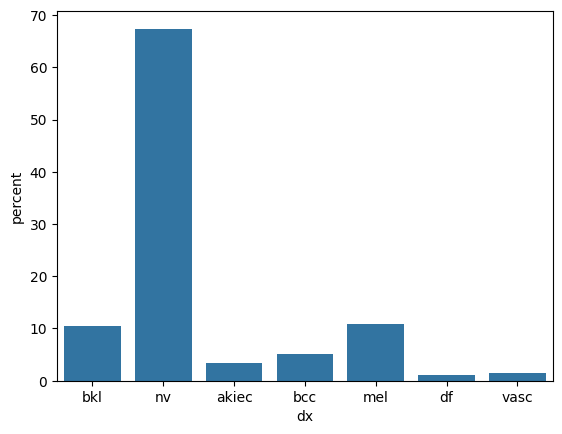

In [ ]:
sns.countplot(Train, x="dx", stat="percent")

In [ ]:
def Augmentation(dat, apply_dx):
  new_data = pd.DataFrame()
  rotations = [
      iaa.Affine(rotate=90),
      iaa.Affine(rotate=180),
      iaa.Affine(rotate=270)
      ]
  for index, line in dat.iterrows():
    if(line['dx']!='nv'):
      image_np = np.array(line['Image'])
      augmented_images = [(rotation(image=image_np)) for rotation in rotations]
      for aug_image in augmented_images:
        new_line = line.copy()
        new_line['Image'] = aug_image
        new_data = pd.concat([new_data, new_line.to_frame().T], ignore_index=True)
  return new_data

In [ ]:
Aug_Data=Augmentation(Train, 'apply_dx')
Aug_Data

,lesion_id,image_id,dx,dx_type,age,sex,localization,Image
0,HAM_0005146,ISIC_0030346,bkl,histo,60.0,male,face,"[[[109, 94, 126], [102, 90, 122], [101, 90, 12..."
1,HAM_0005146,ISIC_0030346,bkl,histo,60.0,male,face,"[[[102, 95, 118], [99, 93, 119], [104, 98, 121..."
2,HAM_0005146,ISIC_0030346,bkl,histo,60.0,male,face,"[[[111, 109, 131], [111, 98, 122], [120, 115, ..."
3,HAM_0006085,ISIC_0033322,bkl,histo,85.0,female,face,"[[[136, 119, 131], [136, 119, 132], [142, 124,..."
4,HAM_0006085,ISIC_0033322,bkl,histo,85.0,female,face,"[[[47, 40, 50], [71, 61, 77], [93, 78, 92], [1..."
...,...,...,...,...,...,...,...,...
5872,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,"[[[11, 13, 23], [14, 15, 25], [31, 30, 50], [5..."
5873,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,"[[[37, 36, 52], [39, 37, 60], [48, 43, 68], [4..."
5874,HAM_0003435,ISIC_0031350,mel,histo,60.0,male,back,"[[[126, 111, 160], [127, 125, 167], [131, 121,..."
5875,HAM_0003435,ISIC_0031350,mel,histo,60.0,male,back,"[[[119, 105, 146], [115, 105, 147], [117, 108,..."


In [ ]:
Train=pd.concat([Train, Aug_Data], ignore_index=True)
Train

,lesion_id,image_id,dx,dx_type,age,sex,localization,Image
0,HAM_0005146,ISIC_0030346,bkl,histo,60.0,male,face,"[[[100, 86, 127], [104, 97, 133], [103, 97, 13..."
1,HAM_0007477,ISIC_0032007,nv,histo,25.0,male,back,"[[[201, 201, 231], [207, 207, 231], [208, 209,..."
2,HAM_0007071,ISIC_0030449,nv,follow_up,35.0,female,trunk,"[[[169, 158, 235], [165, 154, 235], [172, 154,..."
3,HAM_0001767,ISIC_0025812,nv,histo,50.0,female,lower extremity,"[[[165, 145, 164], [168, 146, 165], [165, 142,..."
4,HAM_0003907,ISIC_0027587,nv,follow_up,60.0,male,upper extremity,"[[[144, 127, 218], [141, 125, 219], [126, 111,..."
...,...,...,...,...,...,...,...,...
11881,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,"[[[11, 13, 23], [14, 15, 25], [31, 30, 50], [5..."
11882,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,"[[[37, 36, 52], [39, 37, 60], [48, 43, 68], [4..."
11883,HAM_0003435,ISIC_0031350,mel,histo,60.0,male,back,"[[[126, 111, 160], [127, 125, 167], [131, 121,..."
11884,HAM_0003435,ISIC_0031350,mel,histo,60.0,male,back,"[[[119, 105, 146], [115, 105, 147], [117, 108,..."


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11886 entries, 0 to 11885
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lesion_id     11886 non-null  object
 1   image_id      11886 non-null  object
 2   dx            11886 non-null  object
 3   dx_type       11886 non-null  object
 4   age           11886 non-null  object
 5   sex           11886 non-null  object
 6   localization  11886 non-null  object
 7   Image         11886 non-null  object
dtypes: object(8)
memory usage: 743.0+ KB


<Axes: xlabel='dx', ylabel='percent'>

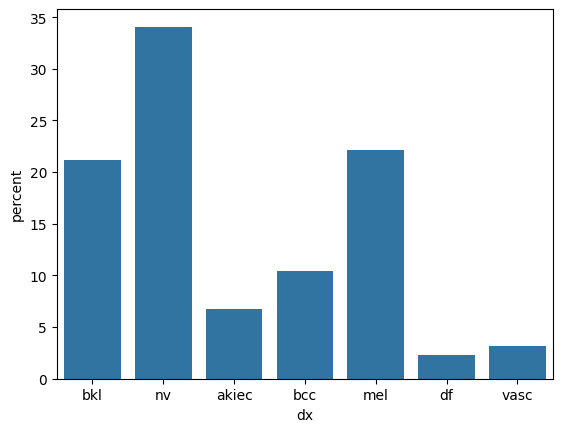

In [ ]:
sns.countplot(Train, x="dx", stat="percent")

Run the following code to normalize the dataset and learn about its shapes:

### Сборка данных

In [10]:
def prepare_data(images):
    m = len(images)
    print(m)
    X = np.zeros((m, height, width, chanels), dtype=np.uint8)
    for i, image_file in enumerate(images):
        X[i,:] = image_file
    return X

In [11]:
X_train = (prepare_data(Train['Image'])/255.).astype(np.float16)
X_test = (prepare_data(Test['Image'])/255.).astype(np.float16)
X_val = (prepare_data(Val['Image'])/255.).astype(np.float16)
print(X_train.dtype)

6009
2003
2003
float16


In [12]:
class_labels = {
    'akiec': 0,
    'bcc': 1,
    'bkl': 2,
    'df': 3,
    'nv': 4,
    'vasc': 5,
    'mel': 6
}
Y_train = to_categorical(Train['dx'].replace(class_labels), num_classes=num_classes)
Y_test = to_categorical(Test['dx'].replace(class_labels), num_classes=num_classes)
Y_val = to_categorical(Val['dx'].replace(class_labels), num_classes=num_classes)

<ipython-input-12-eb22b42d0357>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_train = to_categorical(Train['dx'].replace(class_labels), num_classes=num_classes)
<ipython-input-12-eb22b42d0357>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_test = to_categorical(Test['dx'].replace(class_labels), num_classes=num_classes)
<ipython-input-12-eb22b42d0357>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_object

In [13]:
A_test = (Test['age']/85.).to_numpy().reshape(-1, 1).astype(np.float16)
A_train = (Train['age']/85.).to_numpy().reshape(-1, 1).astype(np.float16)
A_val = (Val['age']/85.).to_numpy().reshape(-1, 1).astype(np.float16)

In [14]:

print ("number of training examples =", X_train.shape[0])
print ("number of test examples =", X_test.shape[0])
print ("X_train shape:", X_train.shape)
print ("Y_train shape:", Y_train.shape)
print ("A_train shape:", A_train.shape)
print ("X_test shape:", X_test.shape)
print ("Y_test shape:", Y_test.shape)
print ("A_test shape:", A_test.shape)
print ("X_val shape:", X_val.shape)
print ("Y_val shape:", Y_val.shape)
print ("A_val shape:", A_val.shape)

number of training examples = 6009
number of test examples = 2003
X_train shape: (6009, 64, 64, 3)
Y_train shape: (6009, 7)
A_train shape: (6009, 1)
X_test shape: (2003, 64, 64, 3)
Y_test shape: (2003, 7)
A_test shape: (2003, 1)
X_val shape: (2003, 64, 64, 3)
Y_val shape: (2003, 7)
A_val shape: (2003, 1)


In [15]:
Train['age'].info()

<class 'pandas.core.series.Series'>
Index: 6009 entries, 482 to 7570
Series name: age
Non-Null Count  Dtype  
--------------  -----  
6009 non-null   float64
dtypes: float64(1)
memory usage: 93.9 KB


###Модель

In [16]:
def create_vgg_model(input_shape, additional_features_shape, classes):
    # Вход для изображений
    image_input = layers.Input(shape=input_shape, name='image_input')

    # Блоки VGG
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(image_input)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Полносвязные слои
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Вход для дополнительных признаков
    additional_input = layers.Input(shape=additional_features_shape, name='additional_input')

    # Объединение входов
    combined = layers.concatenate([x, additional_input])

    # Выходной слой
    output = layers.Dense(classes, activation='softmax')(combined)  # Предполагаем 10 классов

    # Создание модели
    model = models.Model(inputs=[image_input, additional_input], outputs=output)

    return model

### Запускаем Optuna

In [17]:
!pip install optuna
from tensorflow import keras
import optuna
from keras import optimizers

def objective(trial):
    # Гиперпараметры для оптимизации
    learning_rate = trial.suggest_float('lr', 1e-4, 1e-1, log=True)
    batch_size = trial.suggest_int('batch_size', 16, 64)

    # Создание модели
    model = create_vgg_model(input_shape, additional_features_shape, num_classes)

    # Компиляция модели
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Обучение модели
    history = model.fit(
        [X_train, A_train],
        Y_train,
        epochs=trial.suggest_int('epochs', 5, 20),
        batch_size=trial.suggest_int('batch_size', 32, 128),
        validation_data=([X_val, A_val], Y_val),
        verbose=0
    )

    # Оценка модели на валидационной выборке
    score = model.evaluate([X_test, A_test], Y_test)

    return score[1]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.2 MB/s eta 0:00:00


In [18]:
# Определяем параметры
additional_features_shape = (num_additional_features, )  # Количество дополнительных признаков

In [ ]:
optuna.study.delete_study

<function optuna.study.study.delete_study(*, study_name: 'str', storage: 'str | storages.BaseStorage') -> 'None'>

In [19]:
study = optuna.create_study(direction='maximize') # Где хранится study, чтобы его перезаписывать или очищать, когда заново запускаешь Optuna?

# Запуск оптимизации
study.optimize(objective, n_trials=2)

best_hyperparameters = study.best_params
best_score = study.best_value

# Вывод лучших гиперпараметров
print('Best hyperparameters: ', best_hyperparameters)
print('Best accuracy: ', best_score)

[I 2025-03-27 09:07:13,022] A new study created in memory with name: no-name-c27fbc83-b8fb-4602-b890-23d50ea5ded3
/usr/local/lib/python3.11/dist-packages/optuna/trial/_trial.py:678: RuntimeWarning: Inconsistent parameter values for distribution with name "batch_size"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 16, 'high': 64}
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.6579 - loss: 1.0438


[I 2025-03-27 09:11:02,540] Trial 0 finished with value: 0.6779830455780029 and parameters: {'lr': 0.026455479709358475, 'batch_size': 52, 'epochs': 12}. Best is trial 0 with value: 0.6779830455780029.


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6458 - loss: 1.0648


[I 2025-03-27 09:17:33,584] Trial 1 finished with value: 0.6679980158805847 and parameters: {'lr': 0.0031613716458490826, 'batch_size': 43, 'epochs': 20}. Best is trial 0 with value: 0.6779830455780029.


Best hyperparameters:  {'lr': 0.026455479709358475, 'batch_size': 52, 'epochs': 12}
Best accuracy:  0.6779830455780029


### Обучаем на основе лучших параметров по мнению Optuna

In [20]:
model = create_vgg_model(input_shape, additional_features_shape, num_classes)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_hyperparameters['lr']), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(
        [X_train, A_train],
        Y_train,
        epochs=best_hyperparameters['epochs'],
        batch_size=best_hyperparameters['batch_size'],
        validation_data=([X_val, A_val], Y_val)
    )
score = model.evaluate([X_test, A_test], Y_test)
print(f'Test accuracy: {score[1]}')

Epoch 1/12
116/116 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.4443 - loss: 1579675025408.0000 - val_accuracy: 0.6575 - val_loss: 1.1920
Epoch 2/12
116/116 ━━━━━━━━━━━━━━━━━━━━ 31s 93ms/step - accuracy: 0.6734 - loss: 1.1583 - val_accuracy: 0.6575 - val_loss: 1.1361
Epoch 3/12
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.6717 - loss: 1.1086 - val_accuracy: 0.6575 - val_loss: 1.0976
Epoch 4/12
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.6745 - loss: 1.0787 - val_accuracy: 0.6575 - val_loss: 1.0695
Epoch 5/12
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.6802 - loss: 1.0432 - val_accuracy: 0.6575 - val_loss: 1.0517
Epoch 6/12
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.6740 - loss: 1.0458 - val_accuracy: 0.6575 - val_loss: 1.0385
Epoch 7/12
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.6671 - loss: 1.0540 - val_accuracy: 0.6575 - val_loss: 1.0334
Epoch 8/12
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.6741 - lo

In [ ]:
# Выводим информацию о модели
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 64, 64, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 64, 64, 64)     │          1,792 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 32, 32, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 16, 16, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 16, 16, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 16, 16, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 256)    │        590,080 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 8, 8, 256)      │              0 │ conv2d_6[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 8, 8, 512)      │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 512)      │      2,359,808 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 512)      │      2,359,808 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 4, 4, 512)      │              0 │ conv2d_9[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 8192)           │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 4096)           │     33,558,528 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)    

 Total params: 58,003,790 (221.27 MB)

 Trainable params: 58,003,790 (221.27 MB)

 Non-trainable params: 0 (0.00 B)

## Оценки

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, roc_auc_score

preds = model.evaluate([X_test, A_test], Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

# Прогнозирование на тестовых данных
Y_pred = model.predict([X_test, A_test])
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Вычисление дополнительных метрик
accuracy  = preds[1]
loss = preds[0]
precision = precision_score(Y_true_classes, Y_pred_classes, average='weighted')
recall = recall_score(Y_true_classes, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true_classes, Y_pred_classes, average='weighted')
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1 Score = " + str(f1))
print("Mean Absolute Error (MAE) =", mae)
print("Mean Squared Error (MSE) =", mse)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6579 - loss: 1.0443
Loss = 0.9977126121520996
Test Accuracy = 0.6779830455780029
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
Loss = 0.9977126121520996
Test Accuracy = 0.6779830455780029
Precision = 0.5082131744895868
Recall = 0.6779830254618073
F1 Score = 0.5634065380113643
Mean Absolute Error (MAE) = 0.1328169489204829
Mean Squared Error (MSE) = 0.06494375344962759


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


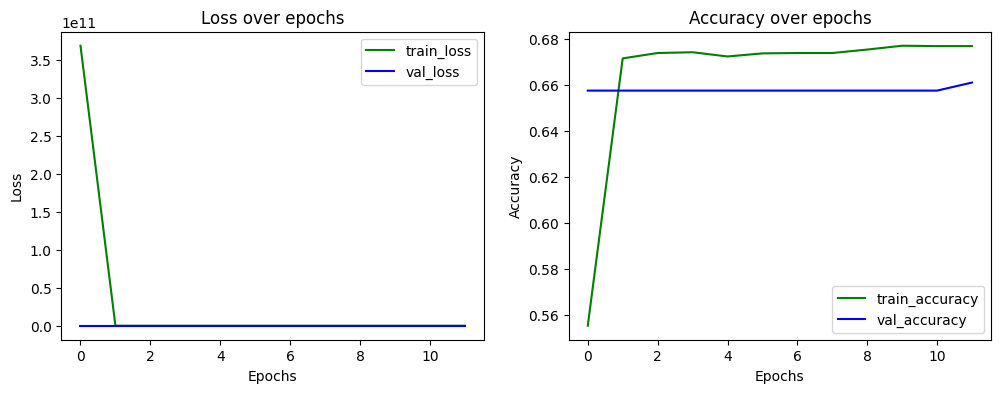

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# Построение графиков потерь и точности
def plot_history(history):
    # График потерь
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train_loss', color='green')
    plt.plot(history.history['val_loss'], label='val_loss', color='blue')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # График точности
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train_accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Вызов функции для построения графиков
plot_history(history)

### **Добавляем матрицу неточностей**

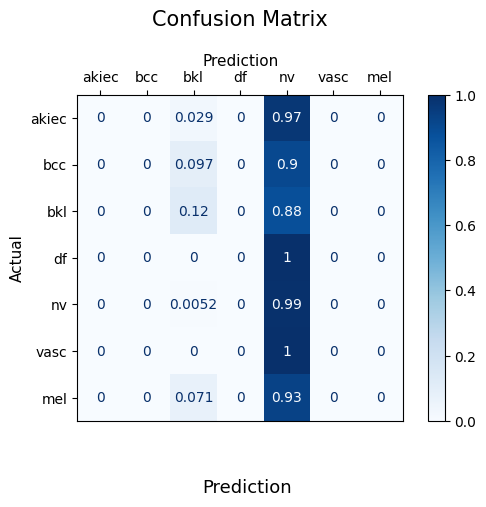

In [24]:
# Помоги пожалуйста данные нужные вставить, если что, вот

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

class_names = ['akiec','bcc','bkl','df','nv','vasc','mel']

cm = confusion_matrix(Y_true_classes, Y_pred_classes, labels=[0, 1, 2, 3, 4, 5, 6])
row_sum = cm.sum(axis=1, keepdims=True)
cm =cm / row_sum
##np.fill_diagonal(cm, 0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
#Customizations
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

plt.show()

###Визуализация наших оценок в столбчатый график

Модель обучилась средне


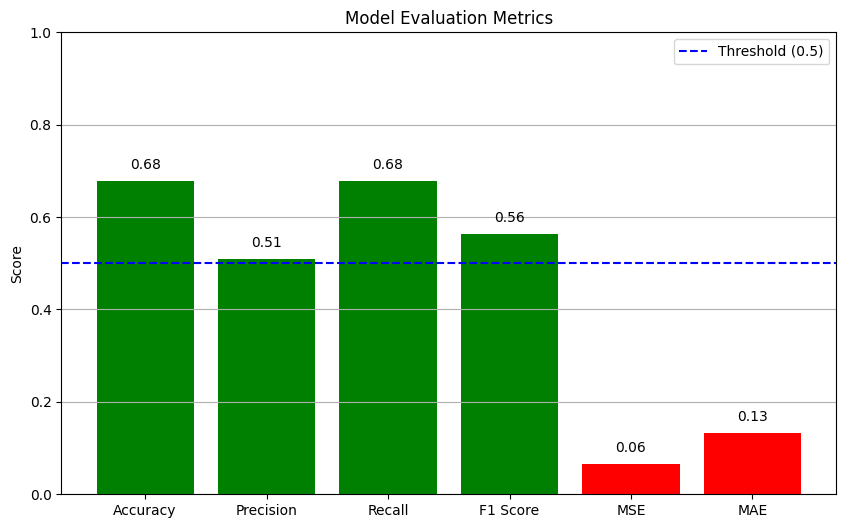

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(accuracy, precision, recall, f1_score, mse, mae):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MSE', 'MAE']
    values = [accuracy, precision, recall, f1_score, mse, mae]

    colors = ['green', 'green', 'green', 'green', 'red', 'red']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics, values, color=colors)

    plt.axhline(y=0.5, color='blue', linestyle='--', label='Threshold (0.5)')

    plt.title('Model Evaluation Metrics')
    plt.ylabel('Score')
    plt.ylim(0, max(max(values), 1))

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

    plt.legend()
    plt.grid(axis='y')

    if accuracy >= 0.8 and precision >= 0.8 and recall >= 0.8 and f1_score >= 0.8:
        print("Модель обучилась хорошо")
    elif accuracy >= 0.5:
        print("Модель обучилась средне")
    else:
        print("Модель обучилась плохо")

    plt.show()

plot_metrics(accuracy, precision, recall, f1, mse, mae)

### Попытка построить ROC-AUC кривую

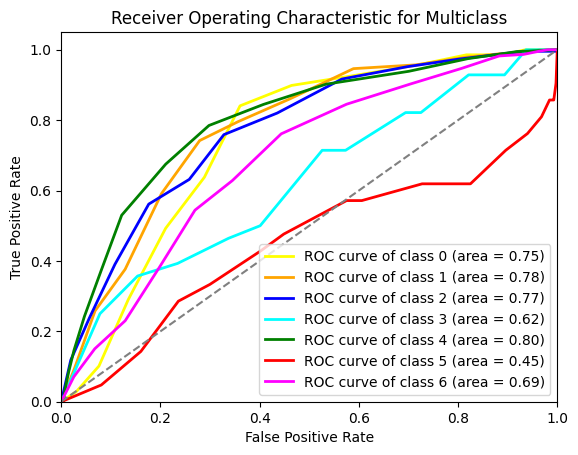

In [26]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Строим ROC-кривую
plt.figure()
colors = ['yellow', 'orange', 'blue', 'cyan', 'green', 'red', 'magenta']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()